In [175]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Libraries

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

# Loading Data from CSV

In [179]:
sales = pd.read_csv('/Users/shivanisingh/Documents/retail_sales_dataset.csv')

# Knowing our data

In [181]:
sales.head()

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
3,SO43843,"Mountain-100 Black, 44",Black,Bikes,Mountain Bikes,NaN,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,5,2024.9940,10124.9700,0.0,809.9976,253.1243
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297


In [182]:
sales.tail()

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
32035,SO61267,"Touring-1000 Blue, 60",Blue,Bikes,Touring Bikes,2384.07,6/30/2013,7/12/2013,7/7/2013,No Discount,Northwest,2,1430.442,2860.884,0.0,228.8707,71.5221
32036,SO61267,"Touring-2000 Blue, 60",Blue,Bikes,Touring Bikes,1214.85,6/30/2013,7/12/2013,7/7/2013,No Discount,Northwest,1,728.910,728.910,0.0,58.3128,18.2228
32037,SO61267,"HL Touring Frame - Blue, 60",Blue,Components,Touring Frames,1003.91,6/30/2013,7/12/2013,7/7/2013,No Discount,Northwest,2,602.346,1204.692,0.0,96.3754,30.1173
32038,SO61267,"Touring-2000 Blue, 54",Blue,Bikes,Touring Bikes,1214.85,6/30/2013,7/12/2013,7/7/2013,No Discount,Northwest,2,728.910,1457.820,0.0,116.6256,36.4455
32039,SO61268,"LL Touring Frame - Yellow, 50",Yellow,Components,Touring Frames,333.42,6/30/2013,7/12/2013,7/7/2013,No Discount,Southwest,3,200.052,600.156,0.0,48.0125,15.0039


In [183]:
sales.shape

(32040, 17)

In [184]:
sales.dtypes

OrderNumber        object
ProductName        object
Color              object
Category           object
Subcategory        object
ListPrice         float64
Orderdate          object
Duedate            object
Shipdate           object
PromotionName      object
SalesRegion        object
OrderQuantity      object
UnitPrice         float64
SalesAmount       float64
DiscountAmount    float64
TaxAmount         float64
Freight           float64
dtype: object

In [185]:
sales[["Orderdate", "Duedate", "Shipdate"]] = sales[["Orderdate", "Duedate", "Shipdate"]].apply(pd.to_datetime)
sales["OrderQuantity"] = pd.to_numeric(sales["OrderQuantity"], errors='coerce').astype('Int64')
sales.dtypes

OrderNumber               object
ProductName               object
Color                     object
Category                  object
Subcategory               object
ListPrice                float64
Orderdate         datetime64[ns]
Duedate           datetime64[ns]
Shipdate          datetime64[ns]
PromotionName             object
SalesRegion               object
OrderQuantity              Int64
UnitPrice                float64
SalesAmount              float64
DiscountAmount           float64
TaxAmount                float64
Freight                  float64
dtype: object

In [186]:
sales.nunique()

OrderNumber       1871
ProductName        250
Color                8
Category             4
Subcategory         33
ListPrice          103
Orderdate           17
Duedate             17
Shipdate            17
PromotionName        7
SalesRegion         10
OrderQuantity       37
UnitPrice          214
SalesAmount       1271
DiscountAmount     382
TaxAmount         1271
Freight           1266
dtype: int64

In [187]:
sales.describe()

,ListPrice,Orderdate,Duedate,Shipdate,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
count,32032.000000,32040,32040,32040,32024.0,32040.000000,32040.000000,32040.00000,32040.000000,32040.000000
mean,714.663419,2012-08-26 13:08:48.539325696,2012-09-07 13:08:48.539325696,2012-09-02 13:08:48.539325952,3.626468,424.122103,1299.023131,8.15285,103.921849,32.475594
min,2.290000,2011-01-29 00:00:00,2011-02-10 00:00:00,2011-02-05 00:00:00,1.0,1.328200,1.374000,0.00000,0.109900,0.034400
25%,54.990000,2012-02-29 00:00:00,2012-03-12 00:00:00,2012-03-07 00:00:00,2.0,32.994000,125.964000,0.00000,10.077100,3.149100
50%,337.220000,2013-01-28 00:00:00,2013-02-09 00:00:00,2013-02-04 00:00:00,3.0,202.332000,445.410000,0.00000,35.632800,11.135300
75%,1079.990000,2013-03-30 00:00:00,2013-04-11 00:00:00,2013-04-06 00:00:00,5.0,647.994000,1457.820000,0.00000,116.625600,36.445500
max,3578.270000,2013-06-30 00:00:00,2013-07-12 00:00:00,2013-07-07 00:00:00,40.0,2146.962000,27893.619000,4005.23760,2231.489500,697.340500
std,851.623778,NaN,NaN,NaN,3.11648,506.799303,2153.316625,78.40708,172.265331,53.832916


# Data Cleaning

In [189]:
sales.isnull().sum()

OrderNumber          0
ProductName          0
Color             2967
Category             0
Subcategory          0
ListPrice            8
Orderdate            0
Duedate              0
Shipdate             0
PromotionName        0
SalesRegion         15
OrderQuantity       16
UnitPrice            0
SalesAmount          0
DiscountAmount       0
TaxAmount            0
Freight              0
dtype: int64

In [190]:
sales['OrderQuantity'] = sales['OrderQuantity'].fillna(1)

In [191]:
sales['ListPrice'] = sales.groupby('ProductName')['ListPrice'].transform(lambda x: x.fillna(x.mean()))
sales['ListPrice'] = sales['ListPrice'].fillna(sales['ListPrice'].mean())

In [192]:
sales = sales[sales['SalesRegion'].notna()]

In [193]:
sales.loc[sales['Orderdate'] > sales['Duedate'] , 'DueData'] = 'OrderDate'

In [194]:
print(sales['SalesAmount'].mean(), sales['SalesAmount'].std(), sales['SalesAmount'].mean() - 3 * sales['SalesAmount'].std(), sales['SalesAmount'].mean() + 3 * sales['SalesAmount'].std())
sales = sales[sales['SalesAmount'] < (sales['SalesAmount'].mean() + (3 * sales['SalesAmount'].std()))] 
sales = sales[sales['SalesAmount'] > (sales['SalesAmount'].mean() - (3 * sales['SalesAmount'].std()))]


1298.8642341233412 2153.181910775347 -5160.681498202701 7758.409966449382


# Data Exploration and Visualization

In [196]:
sales.groupby(['Category']).agg({'OrderQuantity': 'sum'}).reset_index()


,Category,OrderQuantity
0,Accessories,14355
1,Bikes,31987
2,Clothing,35549
3,Components,28148


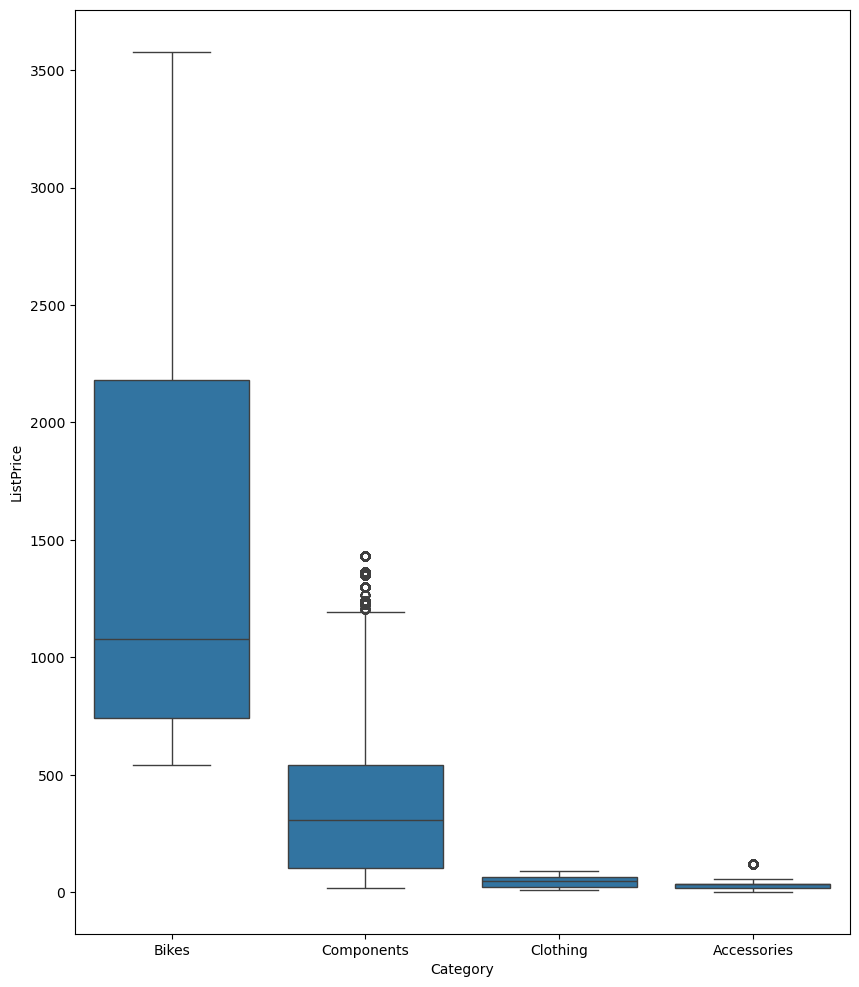

In [197]:
plt.figure(figsize =(10, 12)) 
sns.boxplot(y= sales['ListPrice'], x = sales['Category'])
plt.savefig('boxplot.png')

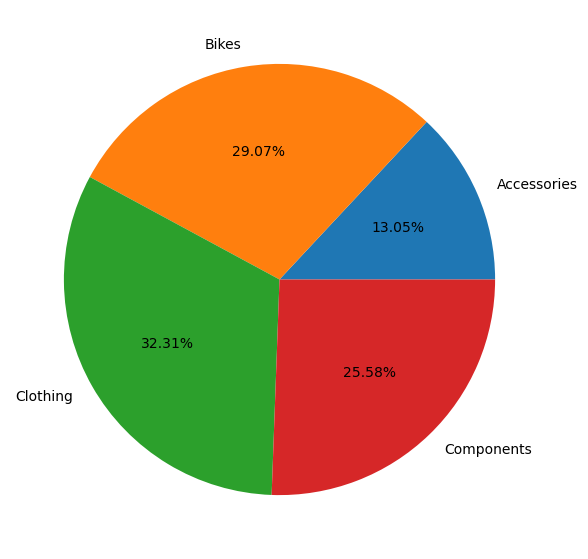

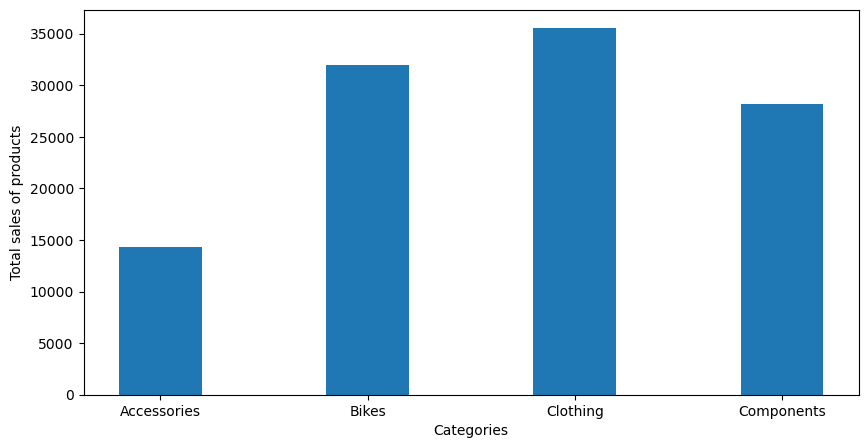

In [198]:
df = sales.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()
fig1 = plt.figure(figsize =(10, 7)) 
plt.pie(df.OrderQuantity, labels = df.Category,autopct='%1.2f%%')
plt.savefig('Pieplot.png')
plt.show() 

fig2 = plt.figure(figsize = (10, 5)) 
plt.bar(df.Category, df.OrderQuantity, width = 0.4)
plt.xlabel("Categories") 
plt.ylabel("Total sales of products")
plt.savefig('BarPlot.png')
plt.show() 

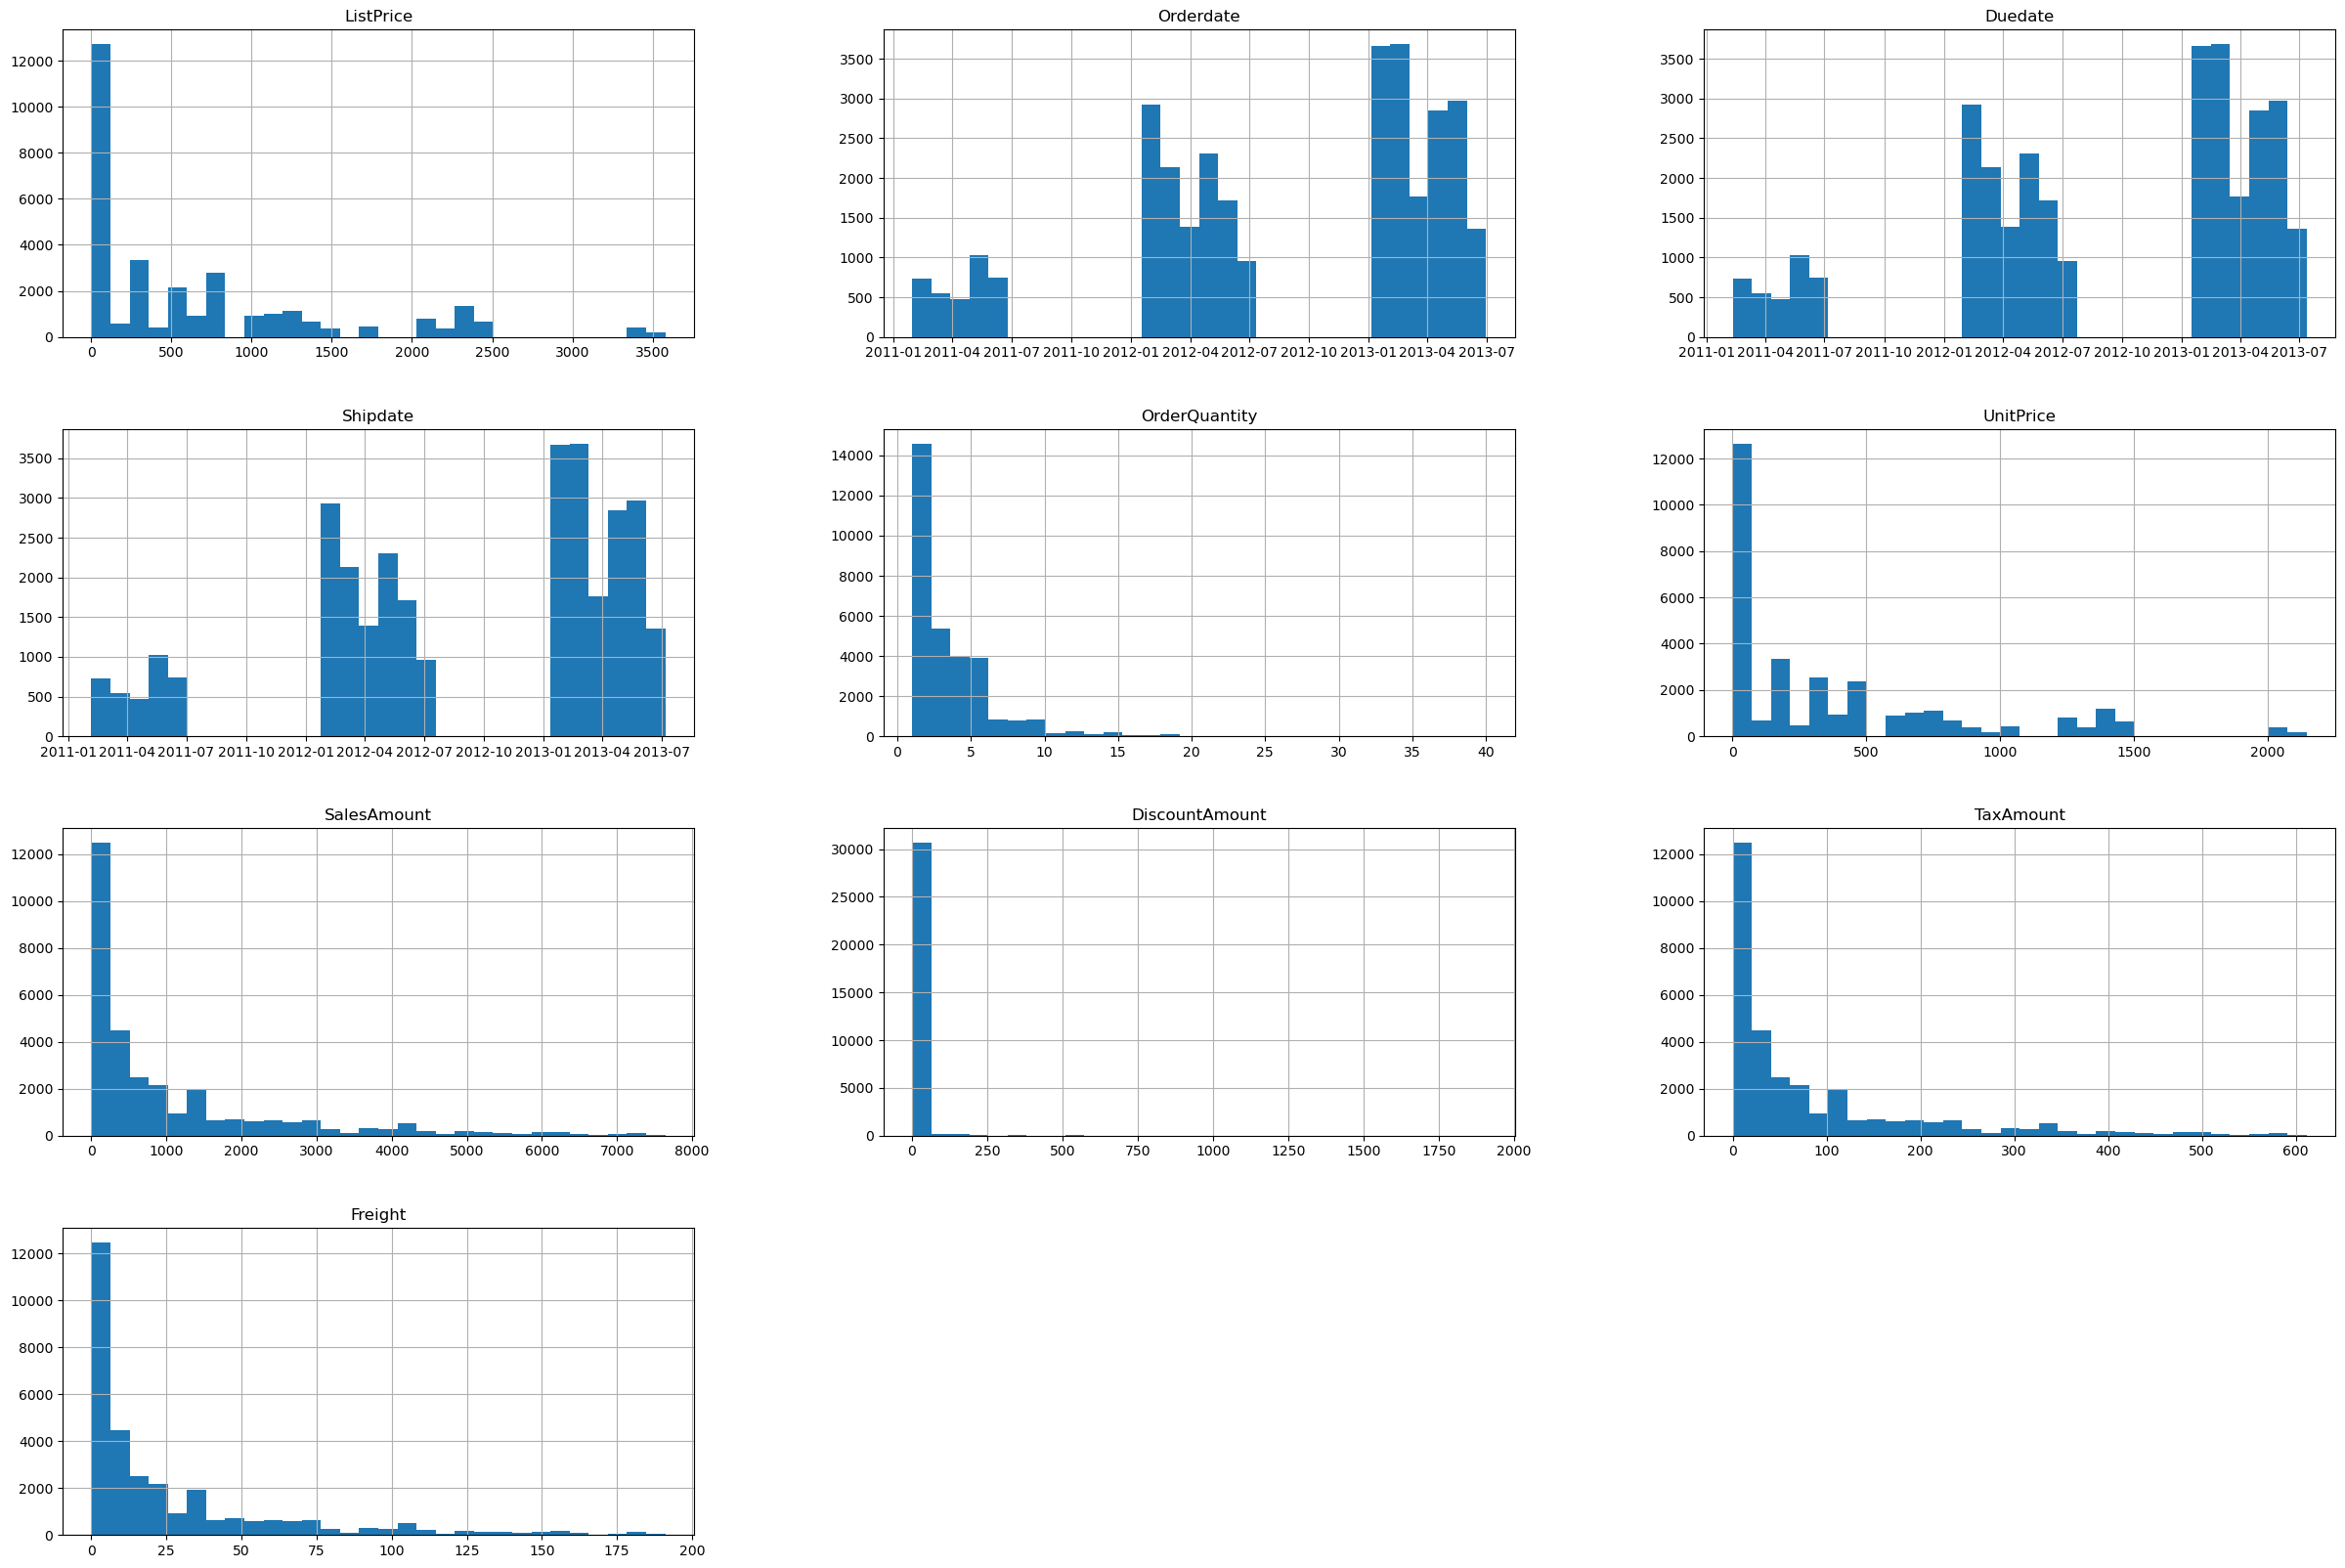

In [199]:
# Plotting histogram for each
sales.hist(bins=30, figsize=(30,20))
plt.savefig('Histogram.png')
plt.show()

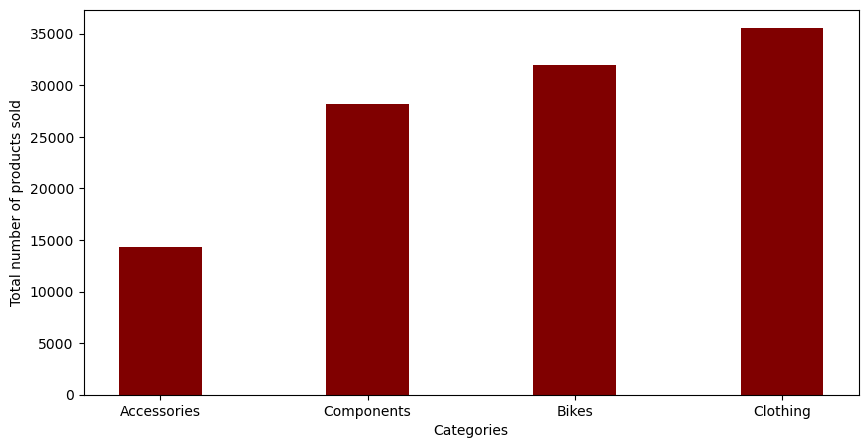

In [200]:
#Category
df=df.sort_values('OrderQuantity')
fig2 = plt.figure(figsize = (10, 5)) 
plt.bar(df.Category, df.OrderQuantity, color ='maroon', width = 0.4)
plt.xlabel("Categories") 
plt.ylabel("Total number of products sold")
plt.savefig('CategoryBar.png')
plt.show() 

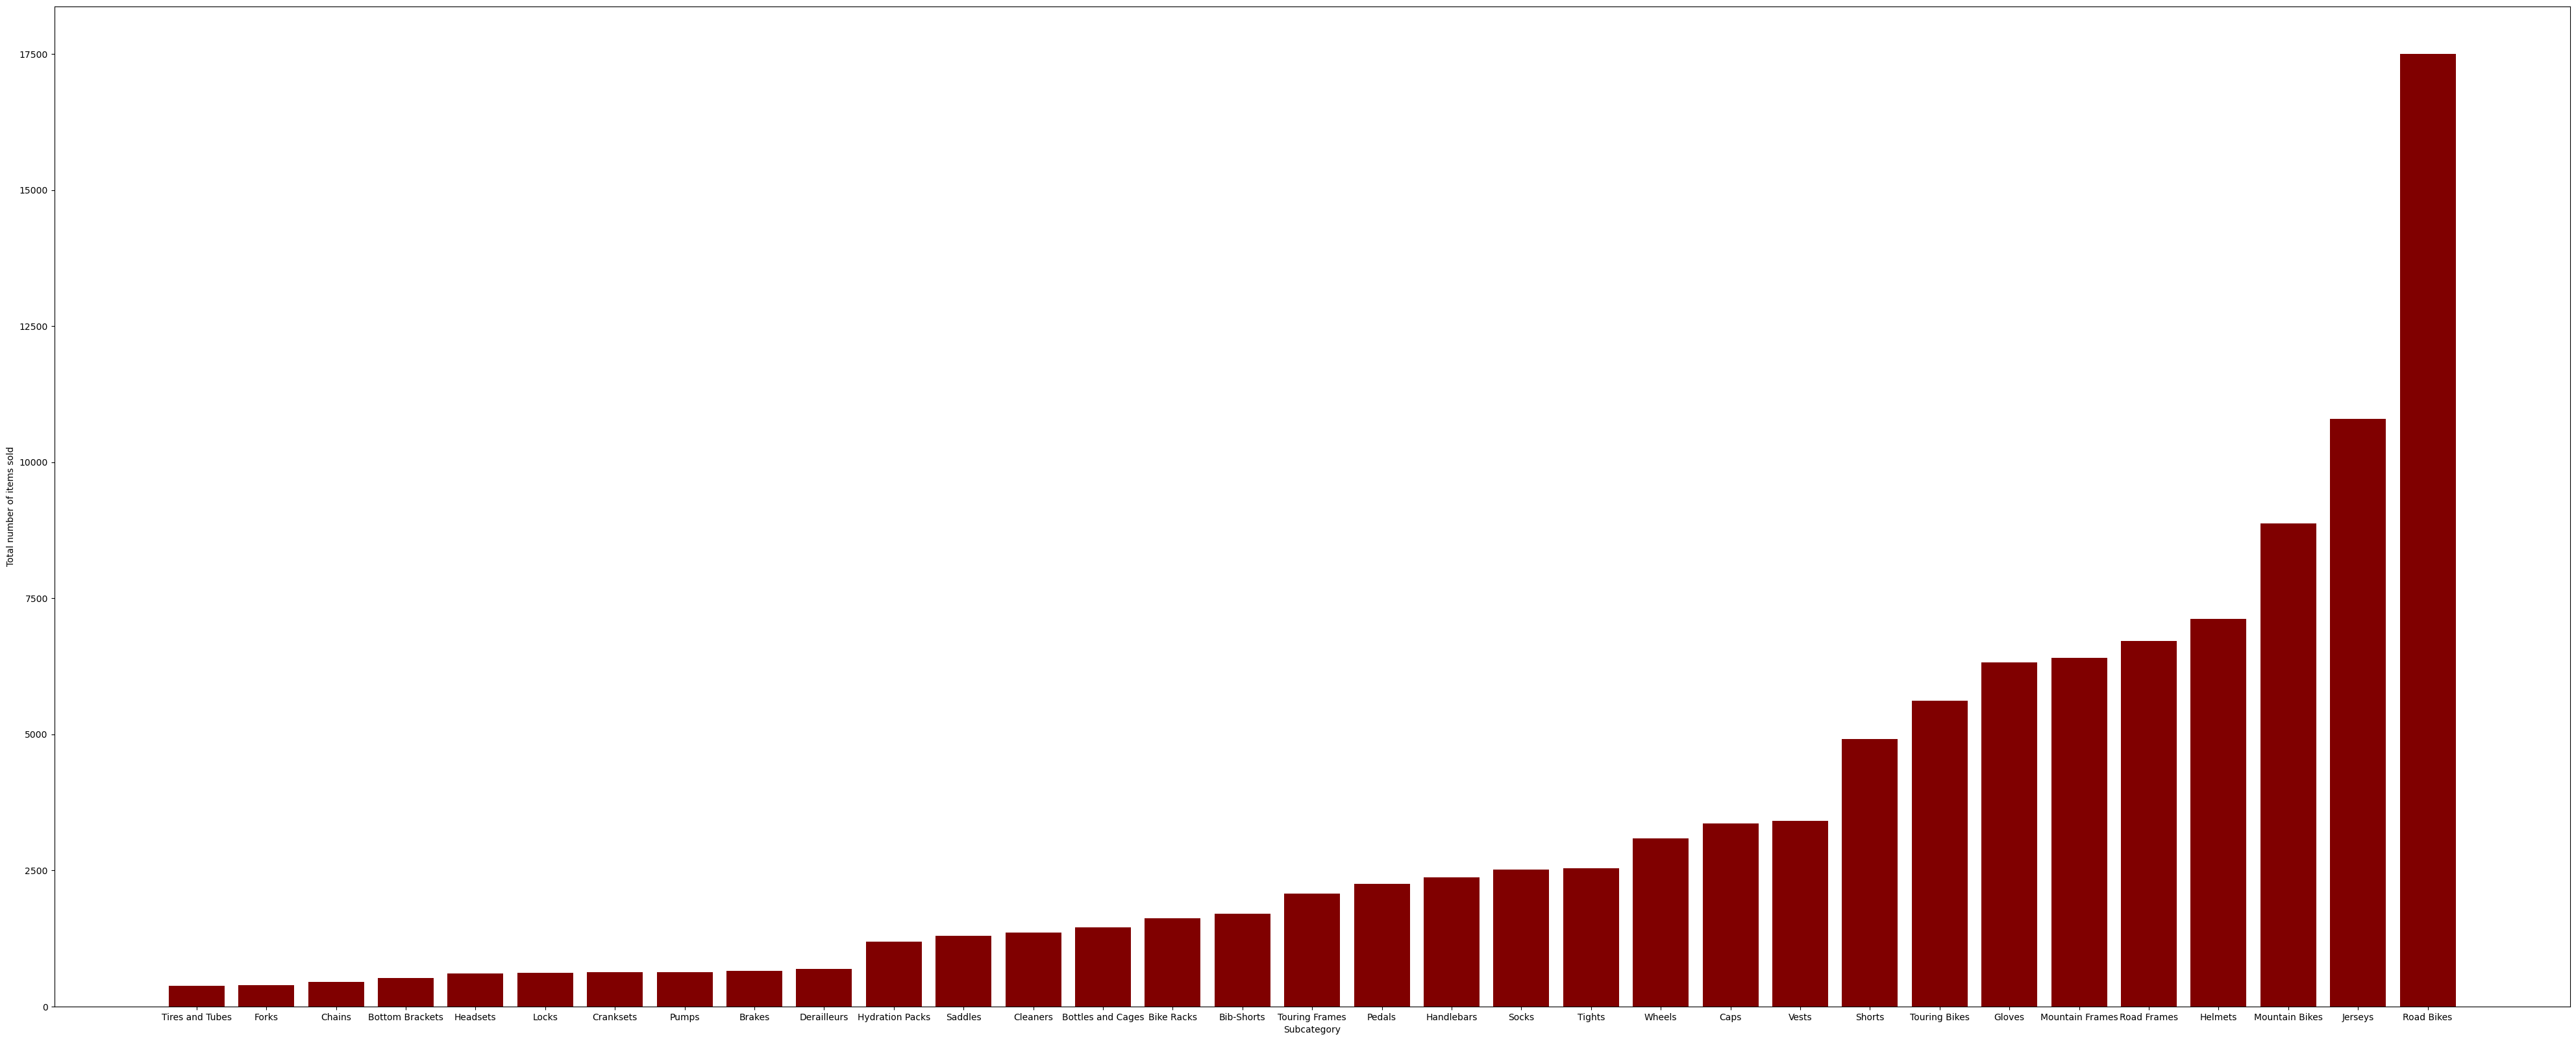

In [201]:
# Sub Category
df = sales.groupby(['Subcategory']).agg({'OrderQuantity':np.sum}).reset_index()
df=df.sort_values('OrderQuantity')
fig = plt.figure(figsize = (50, 20)) 
plt.bar(df.Subcategory, df.OrderQuantity, color ='maroon', width = 0.8)
plt.xlabel("Subcategory") 
plt.ylabel("Total number of items sold")
plt.savefig('Subcategory.png')
plt.show() 

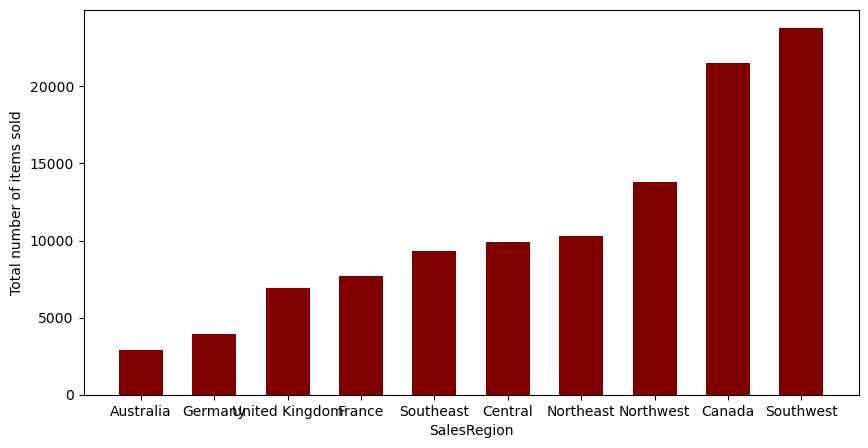

In [202]:
# Region
df = sales.groupby(['SalesRegion']).agg({'OrderQuantity':np.sum}).reset_index().sort_values('OrderQuantity')
fig = plt.figure(figsize = (10, 5)) 
plt.bar(df.SalesRegion, df.OrderQuantity, color ='maroon', width = 0.6)
plt.xlabel("SalesRegion") 
plt.ylabel("Total number of items sold") 
plt.savefig('region.png')
plt.show() 

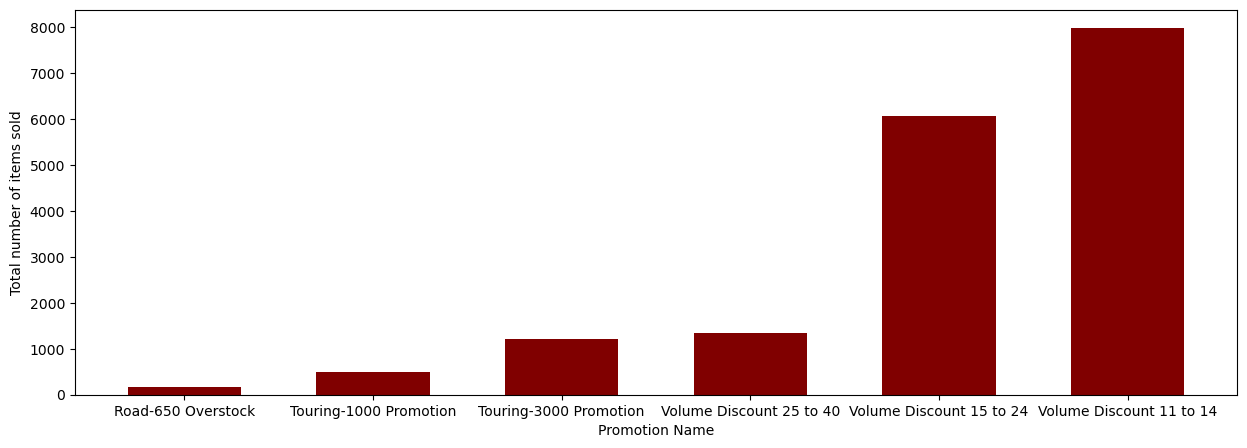

In [203]:
#Promotion
df = sales.groupby(['PromotionName']).agg({'OrderQuantity':np.sum}).reset_index().sort_values('OrderQuantity')
promotionData = df[df.PromotionName != 'No Discount']
fig = plt.figure(figsize = (15, 5)) 
plt.bar(promotionData.PromotionName, promotionData.OrderQuantity, color ='maroon', width = 0.6)
plt.xlabel("Promotion Name") 
plt.ylabel("Total number of items sold")
plt.savefig('PromotionBar.png')
plt.show()

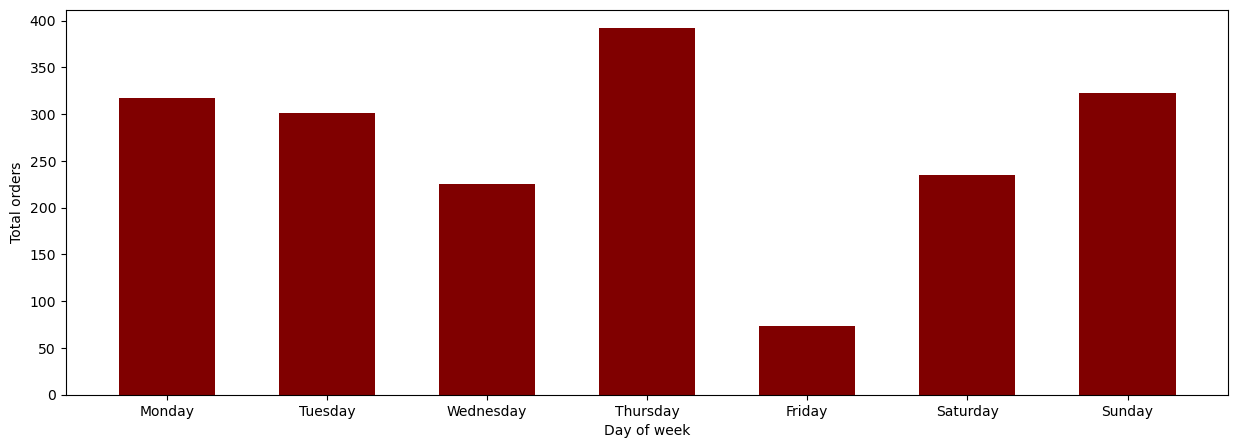

In [204]:
df = sales.groupby(['Orderdate', 'OrderNumber']).size()
new_df = df.to_frame(name = 'size').reset_index()
new_df['NumberofOrders']=1
new_df['day_of_week'] = new_df['Orderdate'].dt.day_name()

dataSales = new_df.groupby('day_of_week')['NumberofOrders'].agg('sum').reset_index()
dataSales = dataSales.loc[[1,5,6,4,0,2,3], :]

fig = plt.figure(figsize = (15, 5)) 
plt.bar(dataSales.day_of_week, dataSales.NumberofOrders, color ='maroon', width = 0.6)
plt.xlabel("Day of week") 
plt.ylabel("Total orders") 
plt.savefig('WeekBar.png')
plt.show()

Index(['PromotionName', 'OrderQuantity'], dtype='object')


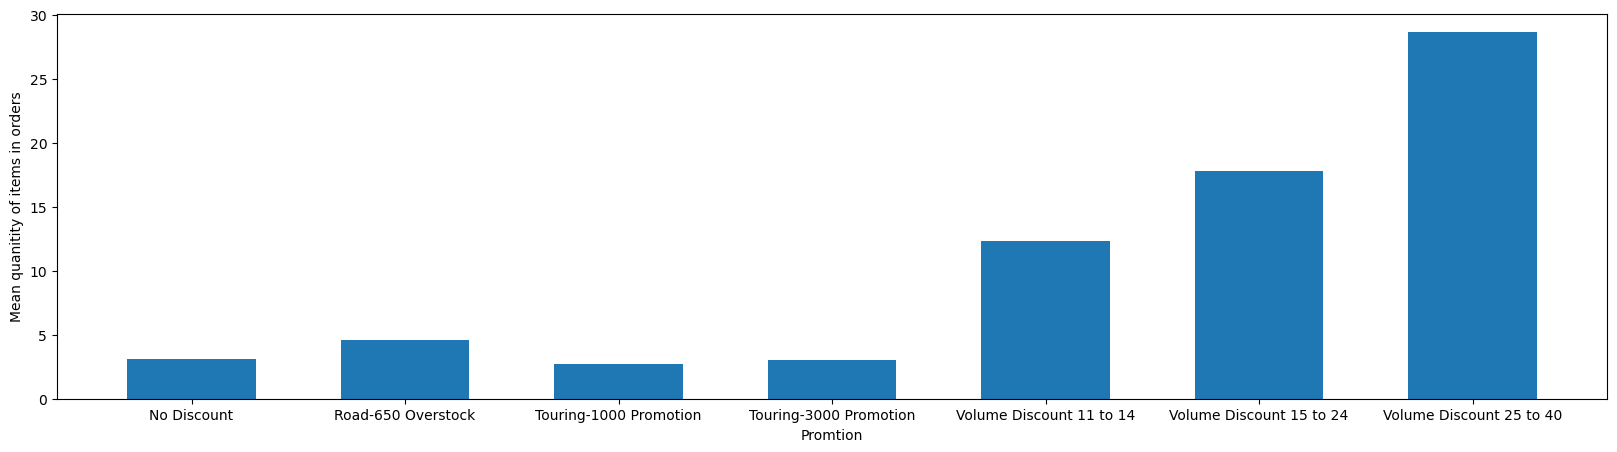

,PromotionName,OrderQuantity
0,No Discount,3.136119
1,Road-650 Overstock,4.567568
2,Touring-1000 Promotion,2.734463
3,Touring-3000 Promotion,3.019753
4,Volume Discount 11 to 14,12.302003
5,Volume Discount 15 to 24,17.818182
6,Volume Discount 25 to 40,28.638298


In [205]:
df = sales.groupby(['OrderNumber','PromotionName']).agg({'OrderQuantity': ['sum']})
df_promo = sales.groupby(['PromotionName'], as_index=False).agg({'OrderQuantity': ['mean']})
df_promo.columns = df_promo.columns.droplevel(1)
df_promo.head(10)
print(df_promo.columns)

#plot bar chart
fig = plt.figure(figsize = (20, 5))
plt.bar(df_promo.PromotionName, df_promo.OrderQuantity, align='center', width=0.6)
plt.xlabel("Promtion") 
plt.ylabel("Mean quanitity of items in orders") 
plt.savefig('promo.png')
plt.show()
df_promo.head(10)

In [206]:
df.head(20)
df = sales.groupby(['OrderNumber'], sort=False).size().reset_index(name='Count')
df['Count'].describe()

count    1866.000000
mean       16.737942
std        16.411185
min         1.000000
25%         3.000000
50%        10.000000
75%        27.000000
max        68.000000
Name: Count, dtype: float64

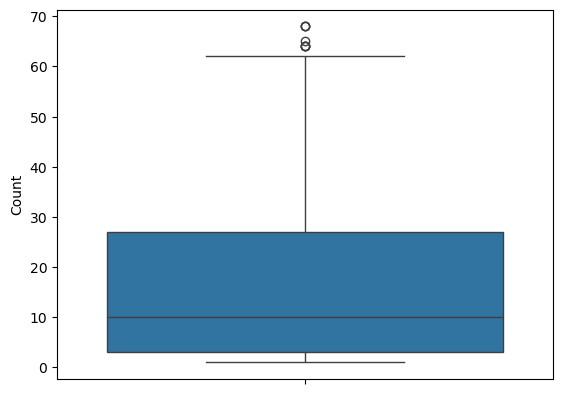

In [207]:
sns.boxplot(y= df['Count'])
plt.savefig('countbox.png')

# Normalization

In [209]:
# z-score normalization
sales['NormalizedPrice'] = sales.iloc[:,5:6].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
sales.head(20)

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight,DueData,NormalizedPrice
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997,NaN,3.409273
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497,NaN,3.378086
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297,NaN,0.670221
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297,NaN,0.670221
5,SO43843,"HL Mountain Frame - Silver, 48",Silver,Components,Mountain Frames,1364.5000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,1,818.7000,818.7000,0.0,65.4960,20.4675,NaN,0.870036
6,SO43843,"HL Mountain Frame - Black, 48",Black,Components,Mountain Frames,1349.6000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,1,809.7600,809.7600,0.0,64.7808,20.2440,NaN,0.851449
7,SO43843,"Mountain-100 Silver, 38",Silver,Bikes,Mountain Bikes,3399.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997,NaN,3.409273
8,SO43843,"Mountain Bike Socks, M",White,Clothing,Socks,9.5000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,5.7000,11.4000,0.0,0.9120,0.2850,NaN,-0.820302
9,SO43843,"Mountain-100 Black, 42",Black,Bikes,Mountain Bikes,3374.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,3,2024.9940,6074.9820,0.0,485.9986,151.8746,NaN,3.378086
14,SO43845,"LL Road Frame - Red, 44",Red,Components,Road Frames,306.5636,2011-01-29,2011-02-10,2011-02-05,No Discount,Southeast,1,183.9382,183.9382,0.0,14.7151,4.5985,NaN,-0.449720


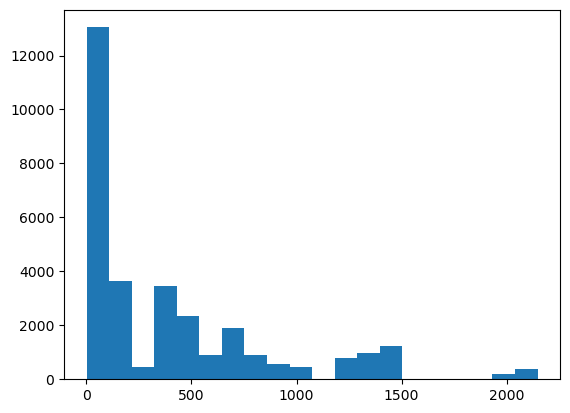

In [210]:
plt.hist(sales.UnitPrice, bins=20)
plt.savefig('skewhisto')

In [211]:
sales['ProcessingDays'] = (sales['Shipdate'] - sales['Orderdate']).dt.days

In [212]:
#Kmeans
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
X= sales.iloc[:,12:13]
X_binned = enc.fit_transform(X)

print('Original Data:\n',X.head(20))
print('Bin edges:\n',enc.bin_edges_)
print('Descritized Data:\n', X_binned[0:20,:])

Original Data:
     UnitPrice
0   2039.9940
1   2024.9940
2    722.5949
4    722.5949
5    818.7000
6    809.7600
7   2039.9940
8      5.7000
9   2024.9940
14   183.9382
15    28.8404
16   419.4589
17   419.4589
18   419.4589
19   874.7940
20   419.4589
21  2146.9620
22   183.9382
23     5.1865
24   183.9382
Bin edges:
 [array([1.32820000e+00, 2.47831080e+02, 6.09701293e+02, 1.07743506e+03,
        1.71513604e+03, 2.14696200e+03])                               ]
Descritized Data:
 [[4.]
 [4.]
 [2.]
 [2.]
 [2.]
 [2.]
 [4.]
 [0.]
 [4.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [4.]
 [0.]
 [0.]
 [0.]]


In [213]:
#correlation coefficients
df = sales.drop(['ProcessingDays', 'NormalizedPrice'], axis=1)
df_numeric = df.select_dtypes(include=[float, int])
corr_matrix = df_numeric.corr()
corr_matrix

,ListPrice,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
ListPrice,1.000000,-0.229128,0.996780,0.769445,0.111123,0.769445,0.769445
OrderQuantity,-0.229128,1.000000,-0.230318,0.096628,0.111333,0.096628,0.096628
UnitPrice,0.996780,-0.230318,1.000000,0.772700,0.048769,0.772700,0.772700
SalesAmount,0.769445,0.096628,0.772700,1.000000,0.110071,1.000000,1.000000
DiscountAmount,0.111123,0.111333,0.048769,0.110071,1.000000,0.110071,0.110071
TaxAmount,0.769445,0.096628,0.772700,1.000000,0.110071,1.000000,1.000000
Freight,0.769445,0.096628,0.772700,1.000000,0.110071,1.000000,1.000000


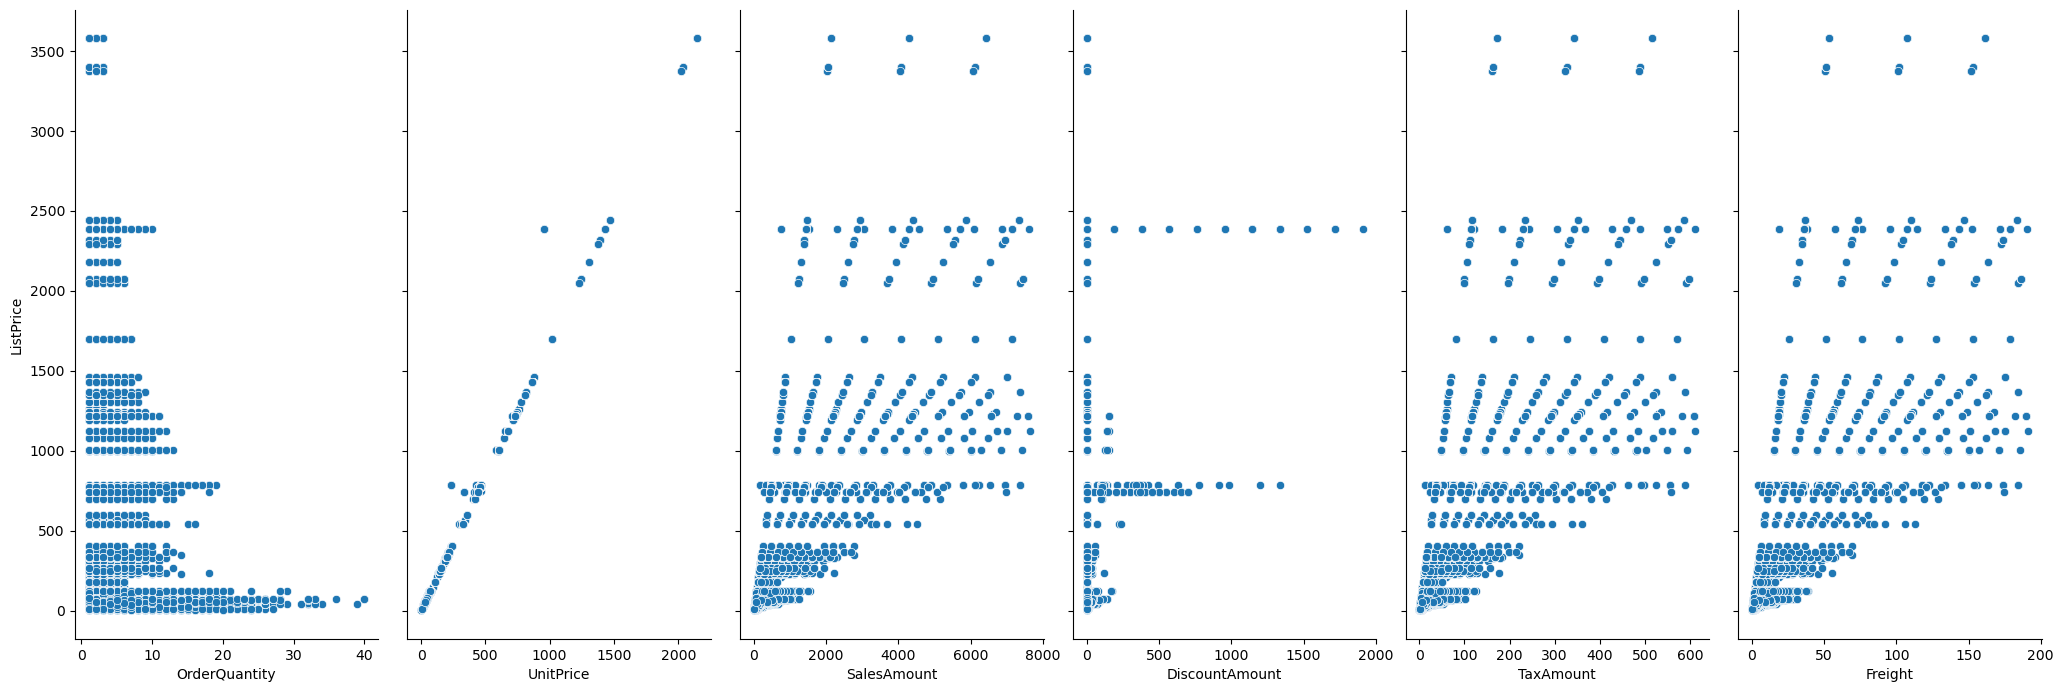

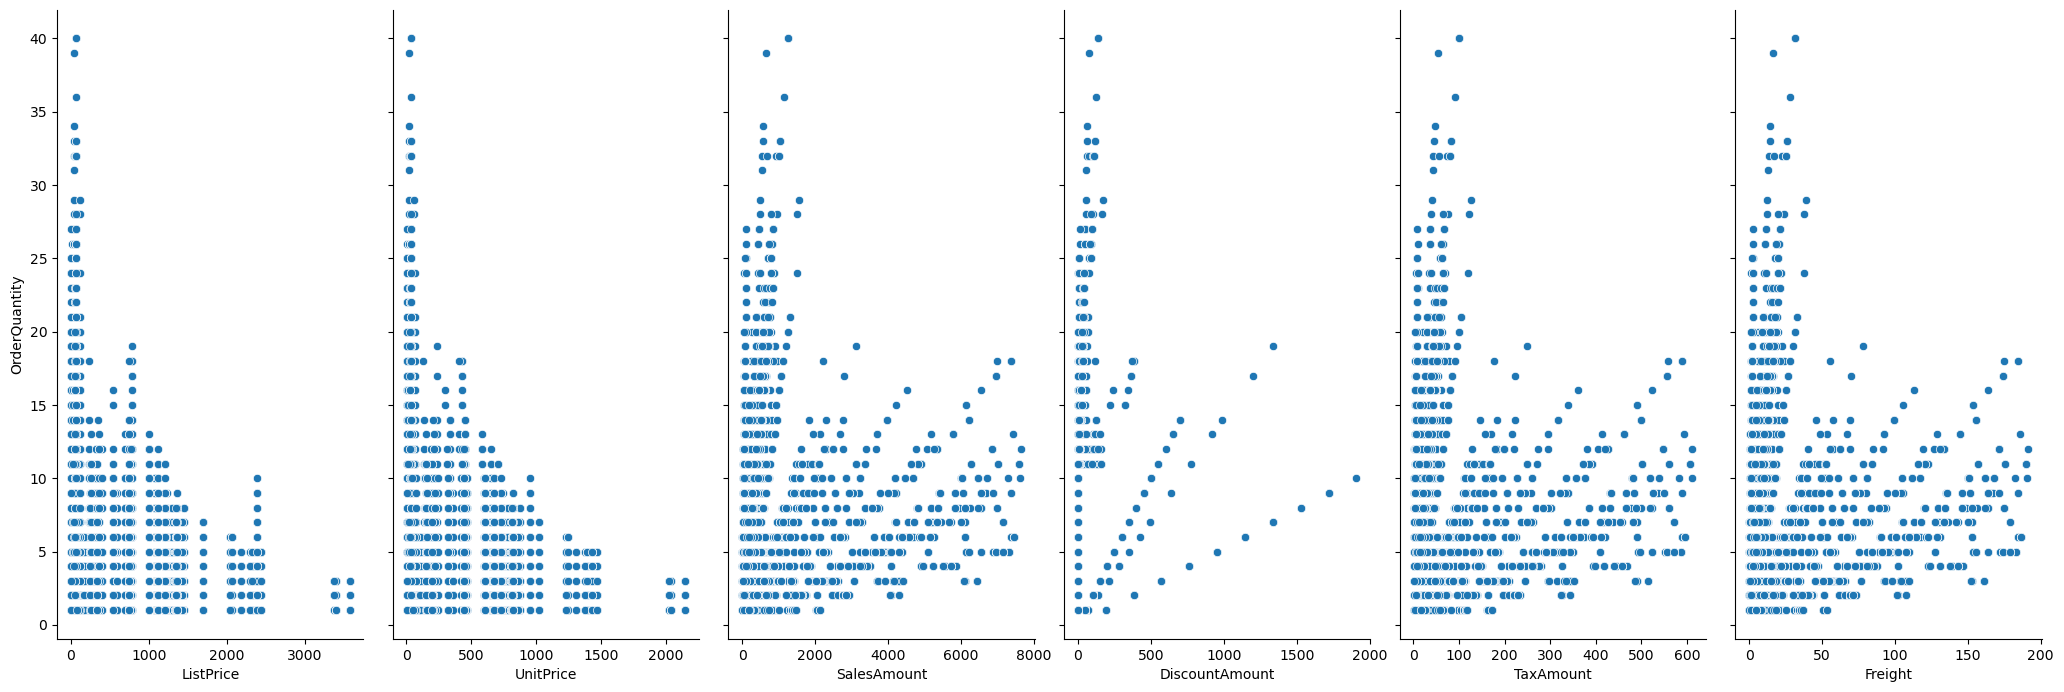

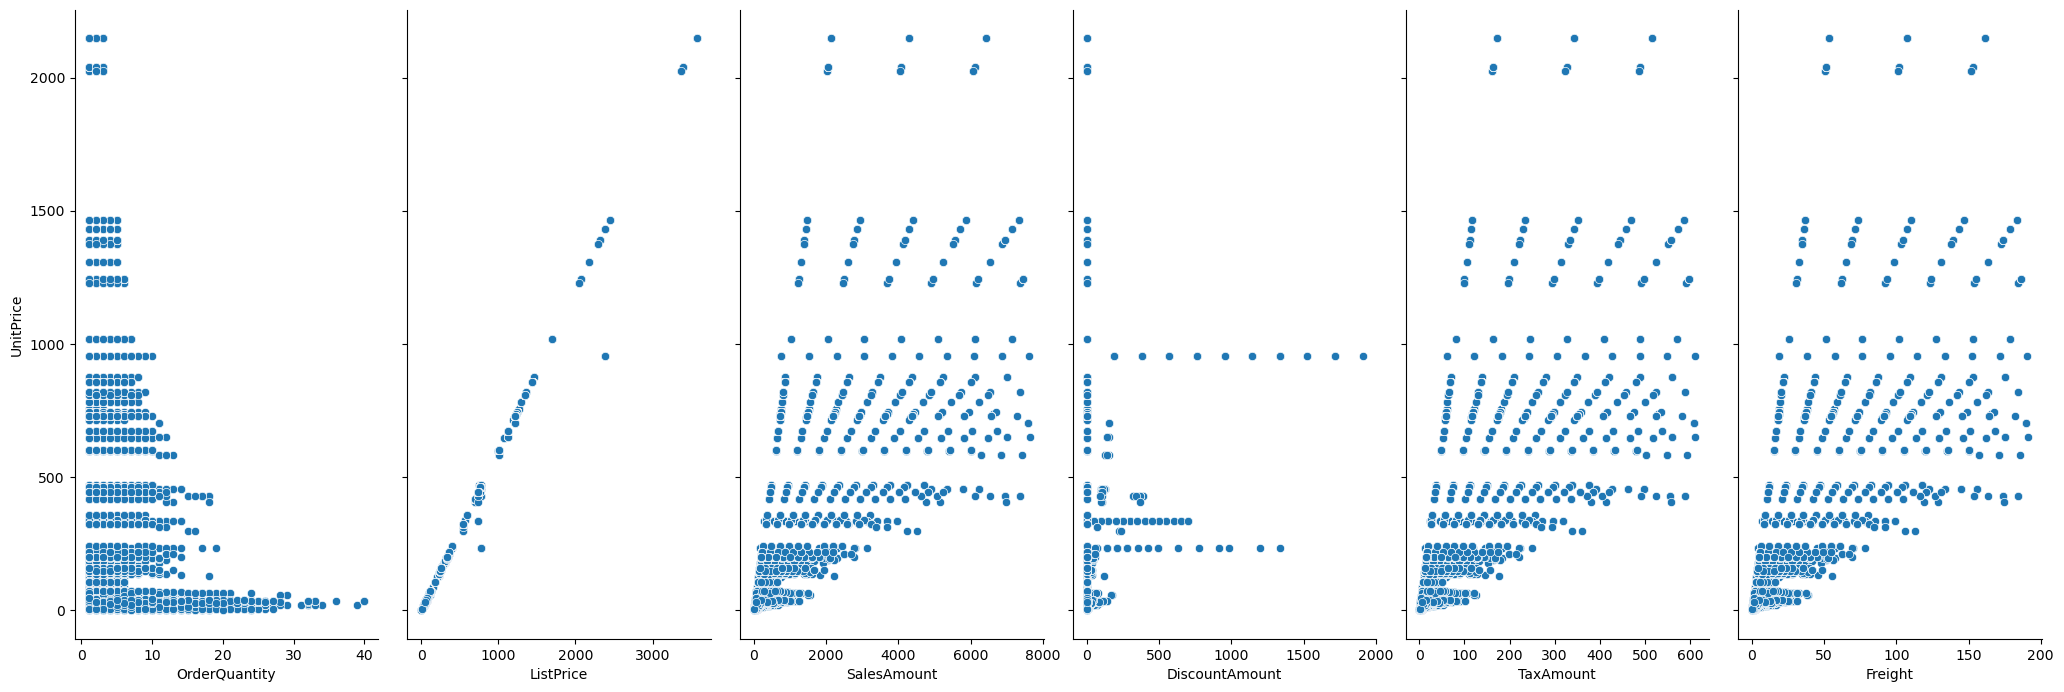

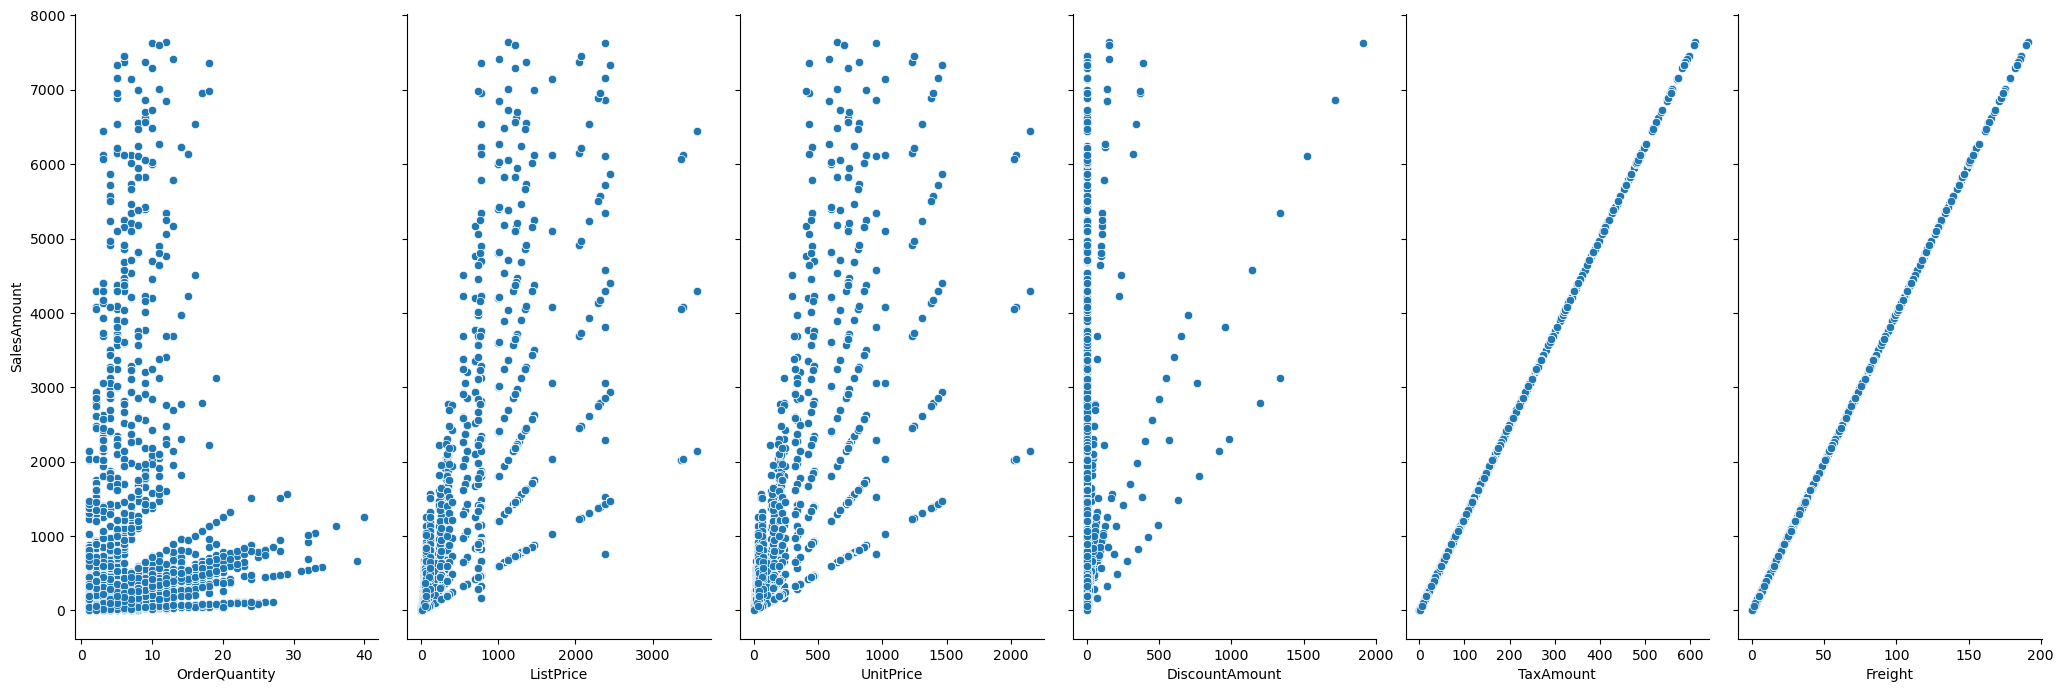

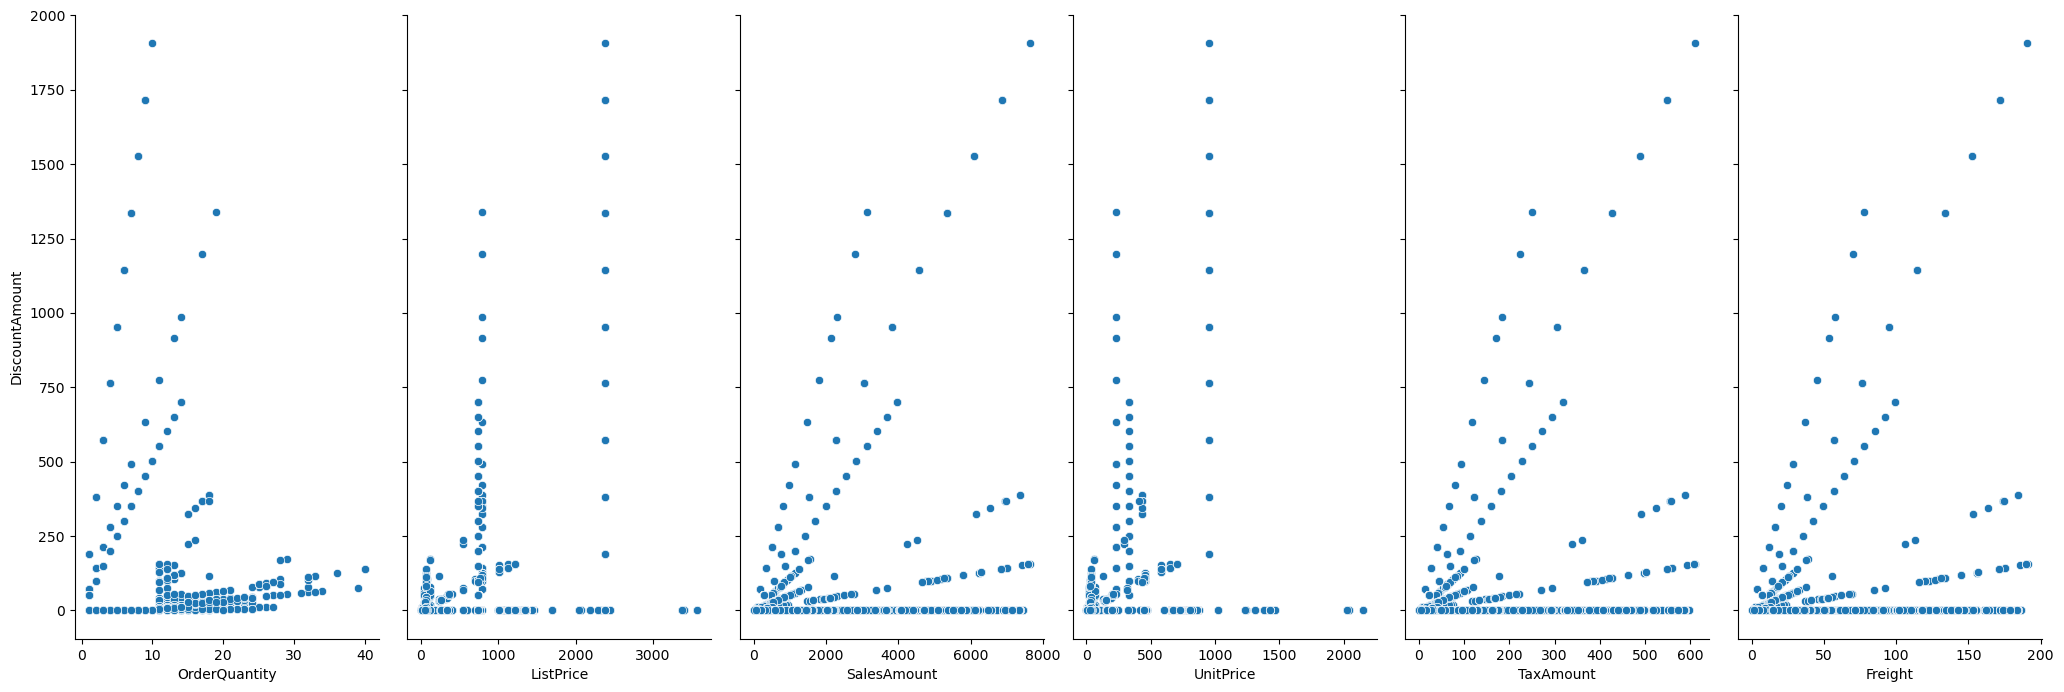

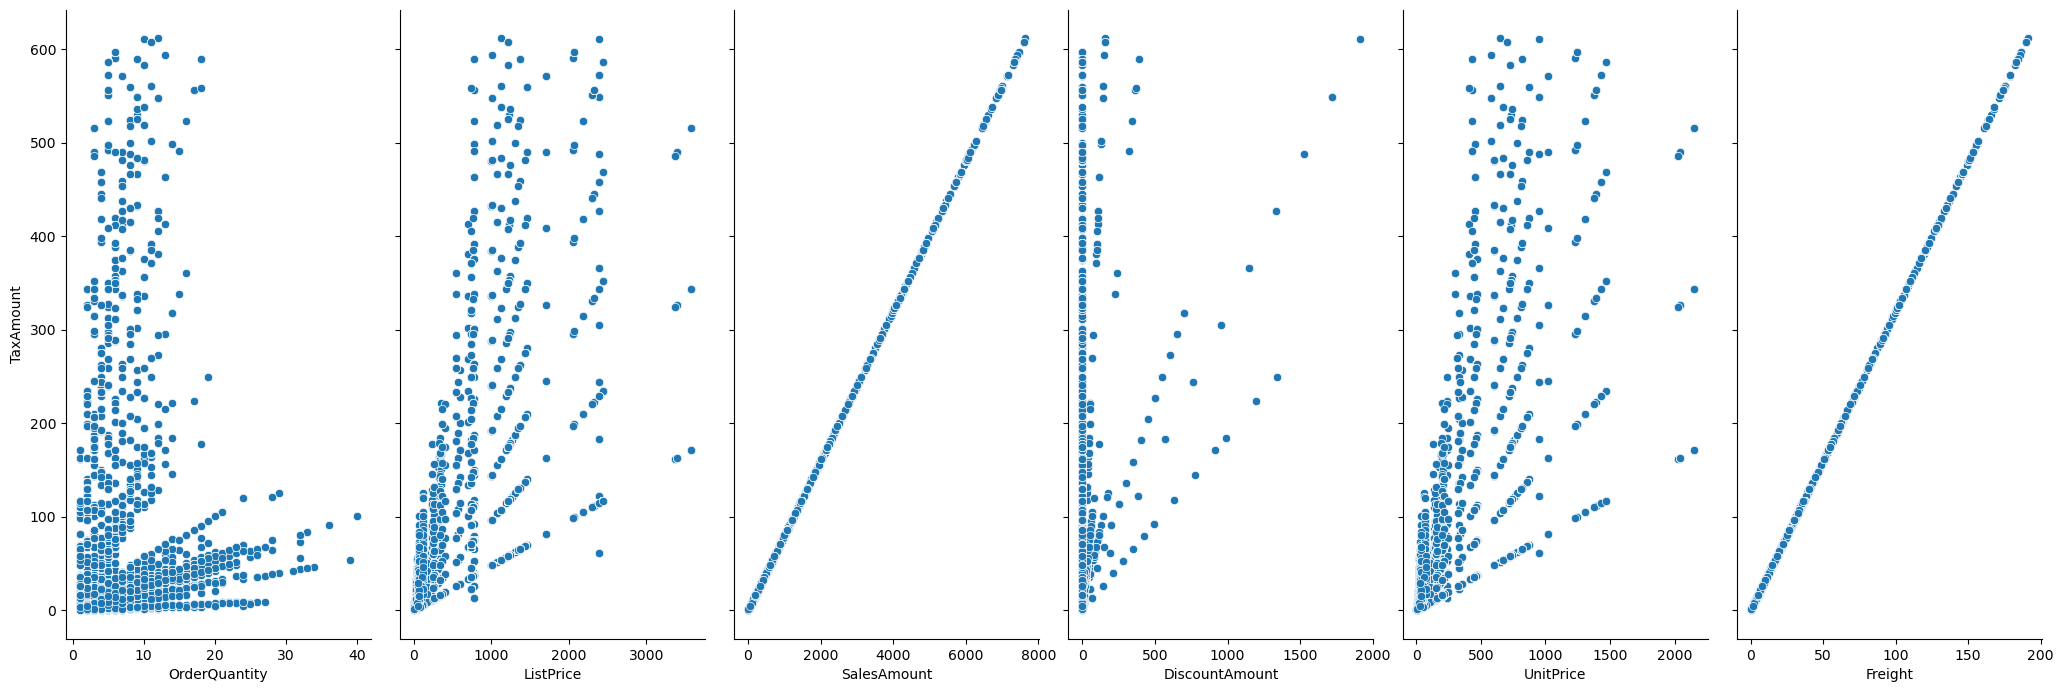

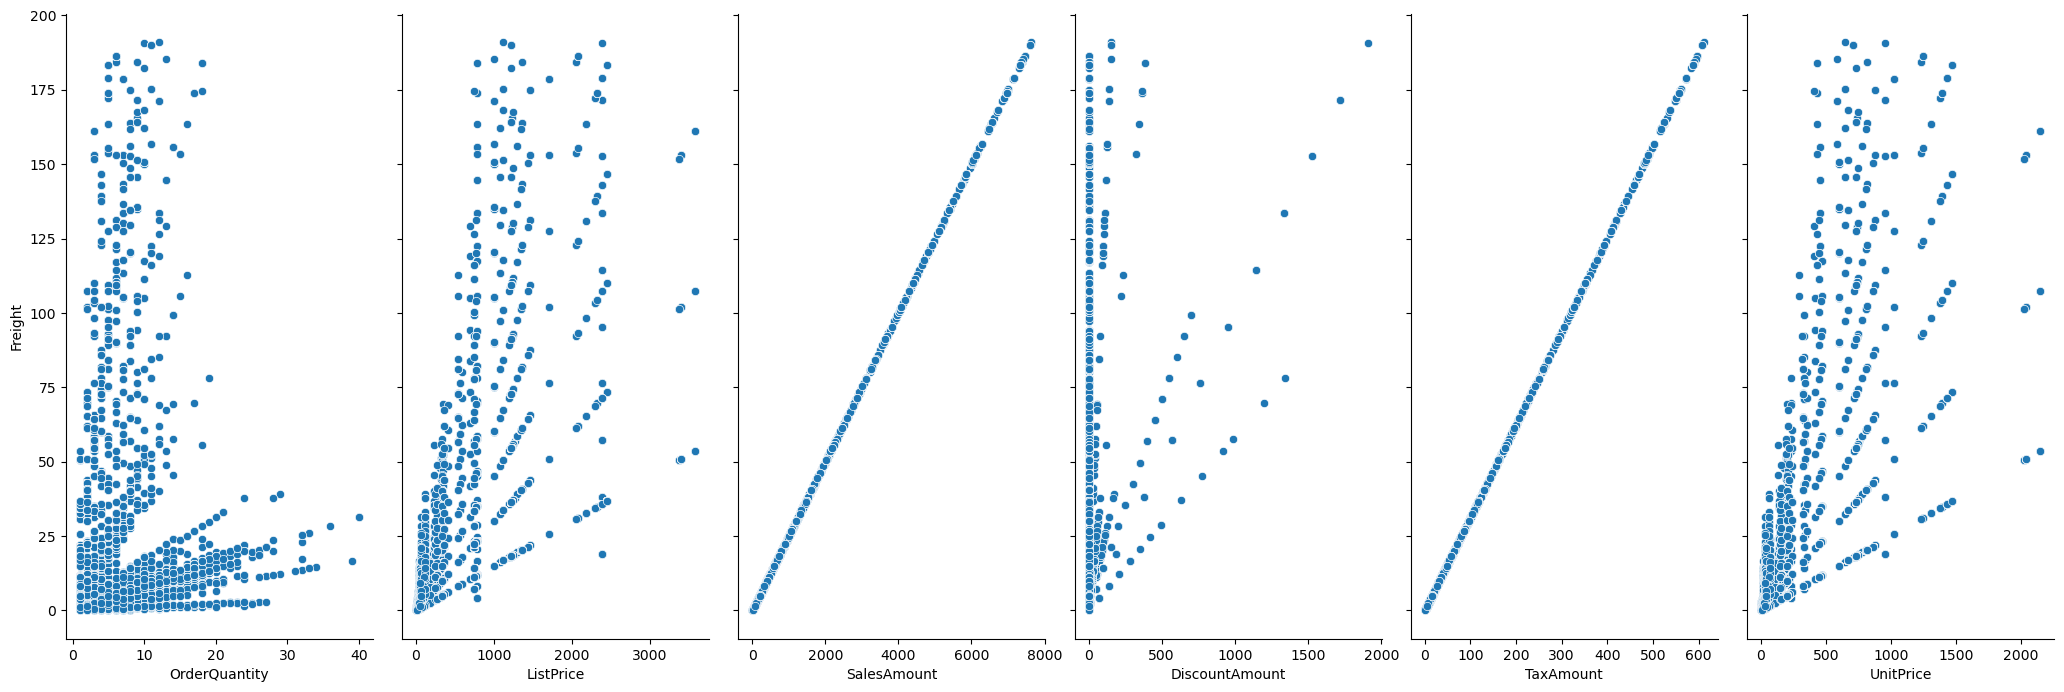

In [214]:
#Scatter plot
fig.set_size_inches(20,10)
sns.pairplot(sales, x_vars=['OrderQuantity','UnitPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='ListPrice', height=7, aspect=0.5)
sns.pairplot(sales, x_vars=['ListPrice','UnitPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='OrderQuantity', height=7, aspect=0.5)
sns.pairplot(sales, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='UnitPrice', height=7, aspect=0.5)
sns.pairplot(sales, x_vars=['OrderQuantity','ListPrice', 'UnitPrice', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='SalesAmount', height=7, aspect=0.5)
sns.pairplot(sales, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'UnitPrice', 'TaxAmount', 'Freight'], y_vars='DiscountAmount', height=7, aspect=0.5)
sns.pairplot(sales, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'DiscountAmount', 'UnitPrice', 'Freight'], y_vars='TaxAmount', height=7, aspect=0.5)
sns.pairplot(sales, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'UnitPrice'], y_vars='Freight', height=7, aspect=0.5)
plt.savefig('scattercorrelation.png')

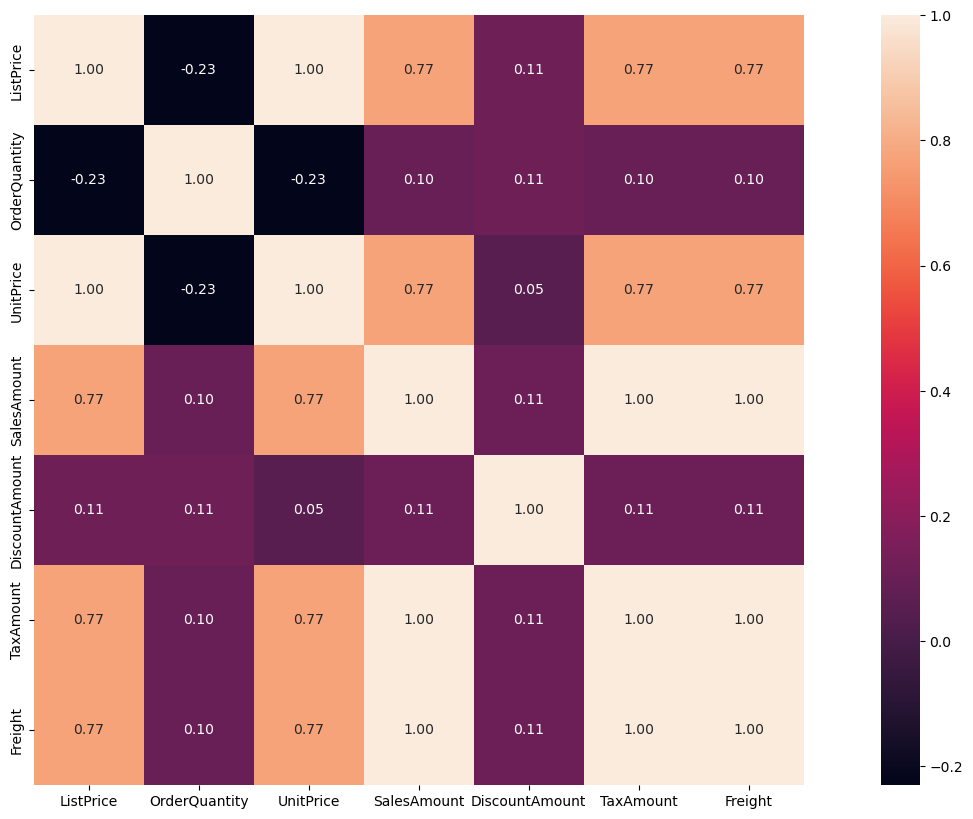

In [215]:
#Heatmap
df = sales.drop(['ProcessingDays', 'NormalizedPrice'], axis=1).select_dtypes(include=[float, int])
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', ax=ax)
plt.savefig('heatmap.png')
plt.show()